In [1]:
#16.2 graph
#importing the necessary libraries
from pylab import *
import numpy as np
import scipy as sp
from numpy import *
import matplotlib.pyplot as plt
from tqdm import tqdm

N=int(4e5) #No of iterations
M=10  #No of taps
L=100 #No of experiments to be averaged over
N_avg =5000 #No of outputs the ensemble MSE is to be averaged over

v_mean=0 #mean of the noise
v_var= 0.001 #Variance of the noise
N_step = 5 # No of points chosen between any two successive x-axis divisions in the graph
mu_val =np.append(np.linspace(1e-4,1e-3,N_step),np.linspace(1e-3,1e-2,N_step)) #over the range of mu values 10^-4 to 10^-2
c= np.array([2,4,3,0.6,1.4,0.15,0.3,0.75,0.9,1]) #The M-tap channel with M=10
Ru=np.diag([1,2,2.4,3,5,1.6,1.8,2.7,2.2,3.5]) #constructing a diagonal matrix with spread (Lambda_max/Lambda_min) =5
u_mean =np.zeros(M) #mean of ui
e= np.zeros((N,L,2*N_step)) #initialising error matrix
MSE_small =np.zeros(2*N_step) #Theoretical MSE for small mu
MSE_sep = np.zeros(2*N_step)  #Theoretical MSE based on separation principle
Tr_Ru = Ru.trace()
MSE_obs = np.zeros(2*N_step) #Observed MSE 


for i in tqdm(range(L)):
    u=np.zeros((N,M)) #instead of using the circulant matrix like I did before, here we are computing directly
    u=np.random.multivariate_normal(u_mean,Ru,N)
    v=np.random.normal(v_mean,v_var,N)
    d =u.dot(c)+v #since ith row of u provides ui
    for j in tqdm(range(2*N_step)):  #over each value of mu
        mu=mu_val[j]
        MSE_small[j]=v_var + (mu*v_var*Tr_Ru)/2  #Use the fact that Jmin = variance of v ,MSE = Jmin +EMSE
        MSE_sep[j]= v_var + ((mu*v_var*Tr_Ru)/(2-mu*Tr_Ru))
        w=np.zeros(M)
        for k in range(N): #LMS over N iterations
            error = d[k] - np.dot(u[k],w) #computing the error here itself to improve speed
            e[k,i,j]=error**2                    #error at ith iteration of jth experiment
            w = w + mu*u[i]*(error)   #lms update equation  


e_avg = (np.sum(e,axis=1,dtype=np.float64))/L #ensemble average over L experiments
MSE_obs=(np.sum(e_avg[-N_avg:],axis=1,dtype=np.float64))/N_avg #experimental MSE

plt.plot(mu_val,10*log10(MSE_obs),'-o')
plt.plot(mu_val,10*log10(MSE_small),'-o')
plt.grid()
plt.show()

plt.plot(mu_val,10*log10(MSE_obs),'-o')
plt.plot(mu_val,10*log10(MSE_sep),'-o')
plt.grid()
plt.show()

 20%|████████████████▌                                                                  | 2/10 [00:13<00:43,  5.40s/it]

KeyboardInterrupt: 

In [4]:
#16.3 Graph
#importing the necessary libraries
from pylab import *
import numpy as np
import scipy as sp
from numpy import *
import matplotlib.pyplot as plt

N=int(4e5)#No of iterations
M=10  #No of taps
L=100 #No of experiments to be averaged over
N_step = 10# No of points chosen between two successive x-axis divisions in the graph
N_avg =int(5e3) #No of outputs the ensemble MSE is to be averaged over

v_mean=0 #mean of the noise
v_var= 0.001 #Variance of the noise
u_mean =np.zeros(M) #mean of ui
#Ru=np.diag([1,2,2.4,3,5,1.6,1.8,2.7,2.2,3.5]) #constructing a diagonal matrix with spread (Lambda_max/Lambda_min) =5
Ru=np.zeros((M,M))
a=0.8 #from the transfer function of the auto regressor
for i in range(M):
    for j in range(M):
        Ru[i,j]=a**(np.abs(i-j))
mu_val =np.append(np.linspace(1e-4,1e-3,N_step),np.linspace(1e-3,1e-2,N_step)) #over the range of mu values 10^-4 to 10^-2
c= np.array([2,4,3,0.6,1.4,0.15,0.3,0.75,0.9,1]) #The M-tap channel with M=10

e= np.zeros((N,L,2*N_step)) #initialising error matrix
MSE_small =np.zeros(2*N_step) #Theoretical MSE for small mu
MSE_sep = np.zeros(2*N_step)  #Theoretical MSE based on separation principle
Tr_Ru = Ru.trace()
MSE_obs = np.zeros(2*N_step) #Observed MSE



for i in tqdm(range(L)):
    u=np.zeros((N,M)) #instead of using the circulant matrix like I did before, here we are computing directly
    u=np.random.multivariate_normal(u_mean,Ru,N)
    v=np.random.normal(v_mean,np.sqrt(v_var),N)
    d =u.dot(c)+v #since ith row of u provides ui
    for j in tqdm(range(2*N_step)):  #over each value of mu
        mu=mu_val[j]
        MSE_small[j]=v_var + (mu*v_var*Tr_Ru)/2  #Use the fact that Jmin = variance of v ,MSE = Jmin +EMSE
        MSE_sep[j]= v_var + ((mu*v_var*Tr_Ru)/(2-mu*Tr_Ru))
        w=np.zeros(M)
        for k in range(N): #LMS over N iterations
            error = d[k] - np.dot(u[k],w) #computing the error here itself to improve speed
            e[k,i,j]=error**2                    #error at ith iteration of jth experiment
            w = w + mu*u[k]*(error)   #lms update equation  


e_avg = (np.sum(e,axis=1,dtype=np.float64)/L) #ensemble average over L experiments
MSE_obs=(np.sum(e_avg[-N_avg:],axis=0,dtype=np.float64)/N_avg) #experimental MSE

plt.semilogx(mu_val,10*log10(MSE_obs),'-o',label='Simulation')
plt.semilogx(mu_val,10*log10(MSE_small),'-d',label='Theory(small $\mu$)') #-d for diamond markers
plt.legend()
plt.grid(which='both') #logarithmically spaced grid
plt.xlabel('step-size')
plt.ylabel('MSE(dB)')
plt.title("LMS: Correlated Gaussian Input with shift structure")
plt.show()

plt.semilogx(mu_val,10*log10(MSE_obs),'-o',label='Simulation')
plt.semilogx(mu_val,10*log10(MSE_sep),'-d',label='Theory(separation)') 
plt.legend()
plt.grid(which='both')
plt.xlabel('step-size')
plt.ylabel('MSE(dB)')
plt.title("LMS: Correlated Gaussian Input with shift structure")
plt.show()


MemoryError: Unable to allocate 5.96 GiB for an array with shape (400000, 100, 20) and data type float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


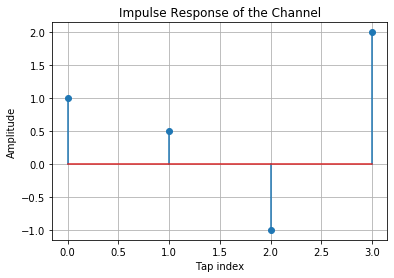

C:\Users\ABHISHEK\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


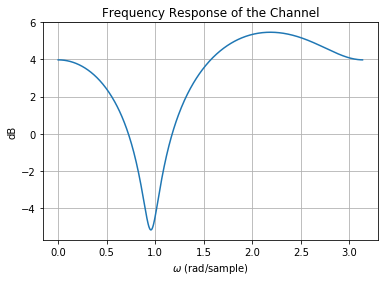

C:\Users\ABHISHEK\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


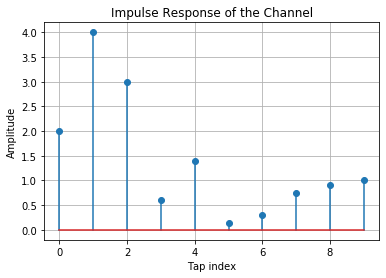

C:\Users\ABHISHEK\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


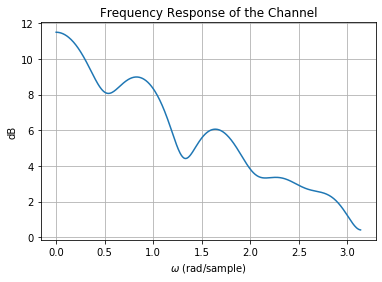

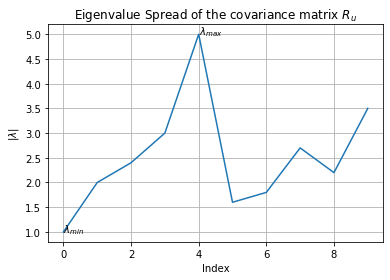

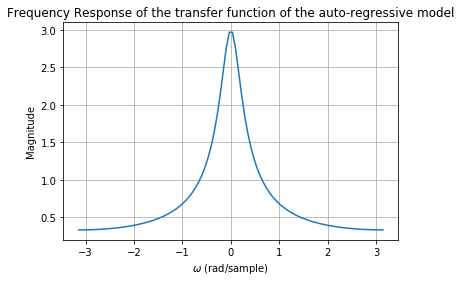

5.50186
0.1138
48.347


In [43]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import signal
from numpy import linalg

#Channel in problem 2
c=np.array([1,0.5,-1,2]) #channel impulse sequence,Mx1 column vector
plt.stem(c)
plt.grid()
plt.title('Impulse Response of the Channel')
plt.xlabel('Tap index')
plt.ylabel('Amplitude')
plt.show()

w,h=sp.signal.freqz(c) #freq response where w is freq and h is the response
plt.plot(w,10*log10(h))
plt.grid()
plt.title('Frequency Response of the Channel')
plt.xlabel('$\omega$ (rad/sample)')
plt.ylabel('dB')
plt.show()


#Channel in problem 3
c2= np.array([2,4,3,0.6,1.4,0.15,0.3,0.75,0.9,1]) #The M-tap channel with M=10
plt.stem(c2)
plt.grid()
plt.title('Impulse Response of the Channel')
plt.xlabel('Tap index')
plt.ylabel('Amplitude')
plt.show()

w2,h2=sp.signal.freqz(c2)
plt.plot(w2,10*log10(h2))
plt.grid()
plt.title('Frequency Response of the Channel')
plt.xlabel('$\omega$ (rad/sample)')
plt.ylabel('dB')
plt.show()

#Eigenvalue spread in Ru
lambda_Ru=np.array([1,2,2.4,3,5,1.6,1.8,2.7,2.2,3.5]) #eigenvalues of Ru with spread (Lambda_max/Lambda_min) =5
plt.plot(lambda_Ru)
plt.annotate('$\lambda_{min}$',(0,1))
plt.annotate('$\lambda_{max}$',(4,5))
plt.grid()
plt.title('Eigenvalue Spread of the covariance matrix $R_{u}$')
plt.xlabel('Index')
plt.ylabel('|$\lambda$|')
plt.show()

#auto-regressive model transfer function
a=0.8
w4=np.linspace(-np.pi,np.pi,100)
f=np.sqrt(1-a**2)/(1-a*np.exp(-1j*w4))
plt.plot(w4,np.abs(f))
plt.grid()
plt.title('Frequency Response of the transfer function of the auto-regressive model')
plt.xlabel('$\omega$ (rad/sample)')
plt.ylabel('Magnitude')
plt.show()

Ru=np.zeros((M,M))
a=0.8 #from the transfer function of the auto regressor
for i in range(M):
    for j in range(M):
        Ru[i,j]=a**(np.abs(i-j))
print(np.round(np.linalg.eig(Ru)[0].max(),5))#max eigenvalue
print(np.round(np.linalg.eig(Ru)[0].min(),5))#min eigenvalue
spread = np.round(np.linalg.eig(Ru)[0].max(),5)/np.round(np.linalg.eig(Ru)[0].min(),5)
print(np.round(spread,3))